# Multiple Linear Regression with King County, WA Housing Data 

## Overview

In this notebook I analyze data on single family homes in King County, to predict the price of houses. To do so, I build an Ordinary Least Squares (OLS) multiple linear regression model to predict house prices using various features from the dataset, as well as evaluate the model and test it for linear regression assumptions.  

Variables in the dataset are listed here:
* `id` - Unique ID for each home sold
* `date` - Date of the home sale
* `price` - Price of each home sold
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* `sqft_living` - Square footage of the apartments interior living space
* `sqft_lot` - Square footage of the land space
* `floors` - Number of floors
* `waterfront` - A dummy variable for whether the apartment was overlooking the waterfront or not
* `view` - An index from 0 to 4 of how good the view of the property wasbv
* `condition` - An index from 1 to 5 on the condition of the apartment,
* `grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* `sqft_above` - The square footage of the interior housing space that is above ground level
* `sqft_basement` - The square footage of the interior housing space that is below ground level
* `yr_built` - The year the house was initially built
* `yr_renovated` - The year of the house’s last renovation
* `zipcode` - What zipcode area the house is in
* `lat` - Lattitude
* `long` - Longitude
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Target Audience/Business Problem 
Here I sought to build a model to predict house prices and unlock insights that would be useful to a local real estate developer looking to optimize for price of house with a limited budget, although any buyer/seller or party interested in the price of a house would also potentially benefit from a model such as this.  

The questions I was looking to answer: 
* What house features have the greatest effect on price?
* How much do each of these features influence house price? 
* Are there common house features that are assumed to affect house prices but don't in this case? 
* How should the results be interpreted in the context of building a house to optimize sale price?

## Required Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import ast 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## I. Explore data / EDA Part 1 
Doing exploratory data analysis (EDA) on the data included creating a pandas dataframe from the file, and then exploring it descriptively and visually to better understand it. I also cleaned the data by removing outliers and created new columns from existing features.

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
zips = pd.read_csv('zips_kc.csv')
zips.towns = zips.towns.apply(lambda x: ast.literal_eval(x))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# TODO add links below 

#### Town names: 
In order to view which towns belonged to which region, I took zipcode and town data I retrieved from another source[] and then added it to the dataframe. The notebook where I worked on this data is here[].  

In [7]:
zips_dict = zips.set_index('zip').to_dict()
zips_dict = dict(zip(zips.zip, zips.towns))
df['towns'] = df.zipcode.apply(lambda x: zips_dict[x] if x in zips_dict.keys() else ['Woodinville'])

### Visually explore features

Here I plotted discrete and continuous variables in scatter plots against price to visually inspect the data 

In [8]:
len(df.drop(['id'],axis=1).columns)

21

<Figure size 432x288 with 0 Axes>

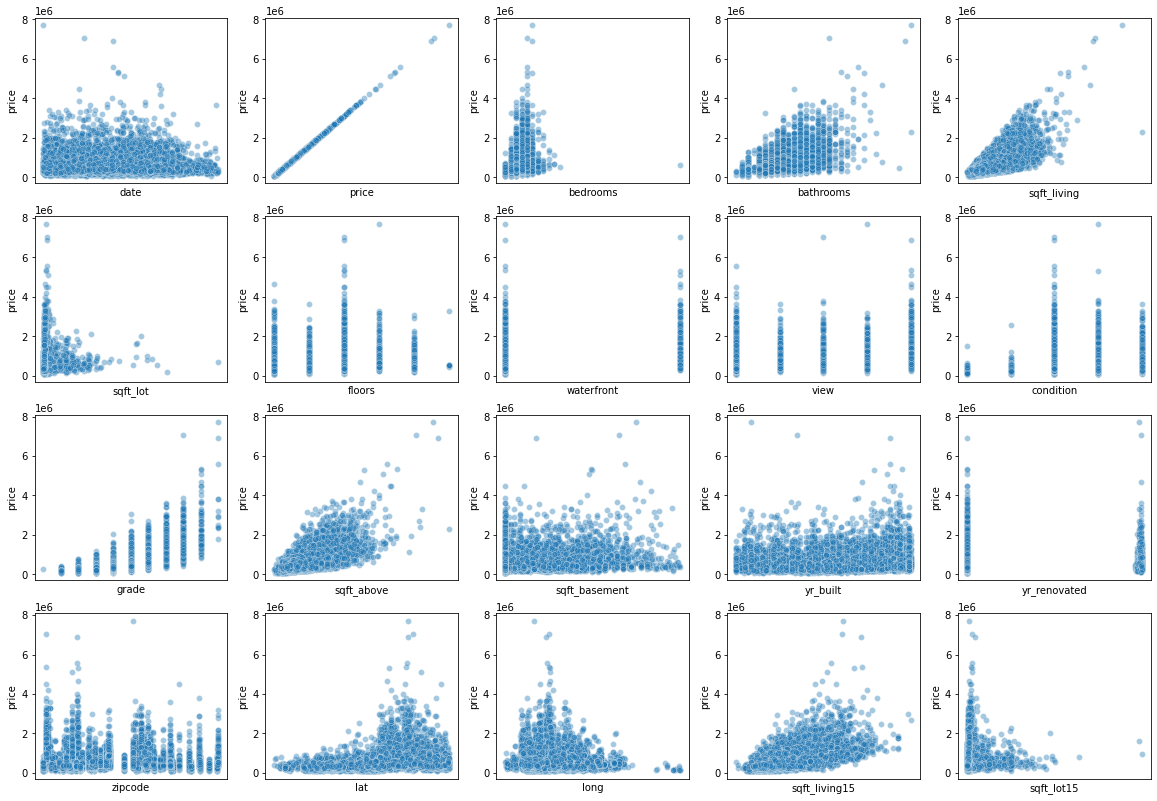

In [9]:
plt.clf()
fig, axes = plt.subplots(nrows = 4, ncols = 5, figsize =(20,14))
index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        try:
            g= sns.scatterplot(x=df.drop('id',axis=1).columns[index], y='price', data=df, ax = axes[row,col], alpha=0.4)
            g.set_xticks([])
            g.set_xticklabels([])
            index += 1
        except:
            break

## II. Data Preprocessing / EDA Part 2

**Removing rows**: Null values and outliers were removed to make the data better for processing 

**Categorical variables:** In addition to removing rows, I was also interested in breaking down certain features which could be better utilized by a regression model. 

### Remove null values

In [10]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
towns               0
dtype: int64

In [11]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
#drop yr_renovated too many outliers 
df = df.drop('yr_renovated',axis=1)

print(df.view.value_counts())
print(df.waterfront.value_counts())

# fill the view and waterfront with 0 
df = df.fillna(value={'view':df.view.mode(),
                      'waterfront':0})

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    19075
1.0      146
Name: waterfront, dtype: int64


### Remove outliers 

I was only interested in single family homes and I wanted to remove houses that were too large, so I looked at the size of the house, as well as the number of bedrooms and bathrooms. First, I explored the data visually using boxplots.

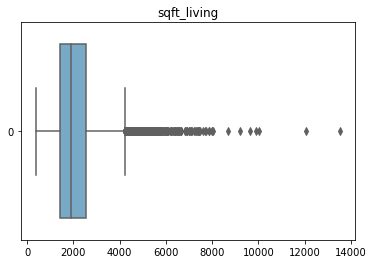

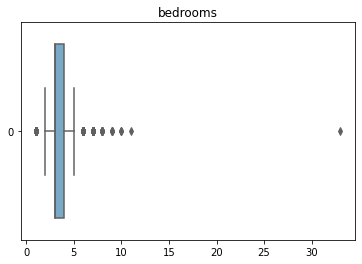

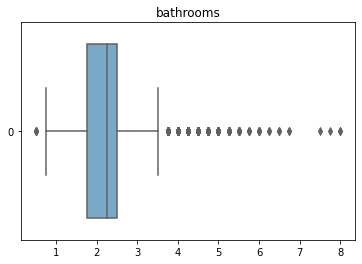

In [13]:
# boxplots for outliers 
for x in ['sqft_living','bedrooms','bathrooms']:
    plt.figure()
    sns.boxplot(data=df[x], orient='h', palette='Blues').set_title(x)
# ax1 = sns.boxplot(data=df['bedrooms'], orient='h')

In [14]:
# 3 standard deviations 
print(np.std(df.bedrooms)*3 + (np.mean(df.bedrooms)))
print(np.std(df.bathrooms)*3 + (np.mean(df.bathrooms)))

6.152032329113039
4.422725752402133


In [15]:
df = df[df.bedrooms < 7]
df = df[df.bathrooms < 5]

In [16]:
print(df.sqft_living.max())
print(df.sqft_living.min())

10040
370


In [17]:
print(len(df))
print(df.sqft_living.mean())
print(df.bathrooms.mode())
print(df.bedrooms.median())
print(df.sqft_lot.mean())
print(df.price.mean())

21479
2064.8769495786582
0    2.5
dtype: float64
3.0
14966.936915126402
534210.3488058103


#### Conclusion: 
My conclusion was to only use data where bedrooms and bathrooms were less than 3 standard deviations from the mean.

### Categorical Variables 

**One Hot Encoding** 

Two variables I was interested in exploring, *condition*, *view* were categorical. In order to analyze them further and prepare them for linear regression one hot encoding was necessary for condition and view. 

In [18]:
# one hot encoding for condition 
# this is just to explore whether there is a relationship with one condition, not necessary 
condition_dummies = pd.get_dummies(df.condition, prefix='cond',drop_first=True)
view_dummies = pd.get_dummies(df.condition, prefix='view',drop_first=True)
df = pd.concat([df, condition_dummies, view_dummies], axis=1)
df.head()

# bathrooms_dummies = pd.get_dummies(df.bathrooms, prefix='bath', drop_first=True)
# bathrooms_dummies.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,towns,cond_2,cond_3,cond_4,cond_5,view_2,view_3,view_4,view_5
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,5650,"[Seattle, Tukwila]",0,1,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7639,[Seattle],0,1,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,8062,"[Kenmore, Bothell]",0,1,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,5000,[Seattle],0,0,0,1,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,7503,"[Sammamish, Redmond]",0,1,0,0,0,1,0,0


#### Splitting data by numeric criteria

Grade is an ordinal variable with rank. Given this, and to simplify the variable, asdI separated grade into three categories: 
* below average(< 7): 0
* average grade (7): 1
* above average (> 7): 2


In [19]:
df.grade.nunique()

11

In [20]:
# label encode a new columns based on info above 
df['grade_encoded'] = df.grade.apply(lambda x: 0 if x < 7 else (1 if x == 7 else 2))

In [21]:
df = df.drop(['condition', 'view','grade'],axis=1)
df.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'towns', 'cond_2', 'cond_3', 'cond_4', 'cond_5', 'view_2', 'view_3',
       'view_4', 'view_5', 'grade_encoded'],
      dtype='object')

**Splitting data by region: North/South and East/West**

I was also interested in exploring geographic data to determine whether there were any relationships with price. In order to do this, I inspected latitude and longitude data with folium. I was interested in dividing the data into different regions and then analyzing against price. I used folium to assist. 

In [22]:
import folium

print(df.long.median())
print(df.lat.median())

-122.23100000000001
47.5716


In [23]:
# split the map into north and south 
m = folium.Map(width=550, height=350, location=[df.lat.median(), df.long.median()],zoom_start=9)
for lat, long in zip(df.head(150).lat, df.head(150).long):
    loc = [lat,long]
    if lat >= 47.5:
        folium.CircleMarker(location=loc, color = 'red').add_to(m)
    else:
        # less than 47.5 
        folium.Marker(location=loc, color = 'blue').add_to(m)
m

In [24]:
# split the map into east and west  
m = folium.Map(width=550, height=350, location=[df.lat.median(), df.long.median()],zoom_start=9)
for lat, long in zip(df.head(150).lat, df.head(150).long):
    loc = [lat,long]
    # east 
    if long >= df.long.median():
        folium.CircleMarker(location=loc, color = 'red').add_to(m)
    # west  
    else:
        folium.Marker(location=loc, color = 'blue').add_to(m)
m        

In [25]:
# add two columns to dataset splitting the data into north, south, east and west 
# predict price based off the latitude/longitude the house is in 
df['north'] = df.lat.apply(lambda x: 1 if x >= df.lat.median() else 0)
df['south'] = df.lat.apply(lambda x: 1 if x < df.lat.median() else 0)
df['east'] = df.long.apply(lambda x: 1 if x >= df.long.median() else 0)
# df['west'] drop for reference variable, if all three are 0 then west 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,cond_4,cond_5,view_2,view_3,view_4,view_5,grade_encoded,north,south,east
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,1180,...,0,0,0,1,0,0,1,0,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,2170,...,0,0,0,1,0,0,1,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,770,...,0,0,0,1,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,1050,...,0,1,0,0,0,1,1,0,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,1680,...,0,0,0,1,0,0,2,1,0,1


#### Town names: 
In order to view which towns belonged to which region, I took zipcode and town data I retrieved from another source and then added it to the dataframe. 

In [26]:
zips_dict = zips.set_index('zip').to_dict()
zips_dict = dict(zip(zips.zip, zips.towns))
df['towns'] = df.zipcode.apply(lambda x: zips_dict[x] if x in zips_dict.keys() else ['Woodinville'])

In [27]:
north_towns = []
south_towns = []
for index,row in df.iterrows():
    if row['north'] == 1:
        for town in row['towns']:
            if town not in north_towns:
                north_towns.append(town)
    else:
        for town in row['towns']:
            if town not in south_towns:
                south_towns.append(town)

In [28]:
for town in north_towns:
    print(town)

Seattle
Kenmore
Bothell
Sammamish
Redmond
Bellevue
Duvall
Shoreline
Beaux Arts Village
Clyde Hill
Hunts Point
Yarrow Point
Kirkland
Issaquah
Mercer Island
Woodinville
Lk Forest Park
Lk Forest Pk
Lake Forest Park
Carnation
Fall City
Medina
Snoqualmie


In [30]:
south_towns

['Seattle',
 'Tukwila',
 'Auburn',
 'Federal Way',
 'Des Moines',
 'Normandy Park',
 'Seatac',
 'Burien',
 'Maple Valley',
 'Mercer Island',
 'Kent',
 'Issaquah',
 'Renton',
 'Algona',
 'Newcastle',
 'Vashon',
 'Covington',
 'Black Diamond',
 'North Bend',
 'Snoqualmie',
 'Bellevue',
 'Enumclaw',
 'Fall City',
 'Sammamish']

## III. Variable Selection / EDA Part 3
Deciding which variables I would use for the model. 

### Correlation and Collinearity
Here I wanted to check to see which variables were most correlated with price, and which variables were collinear.

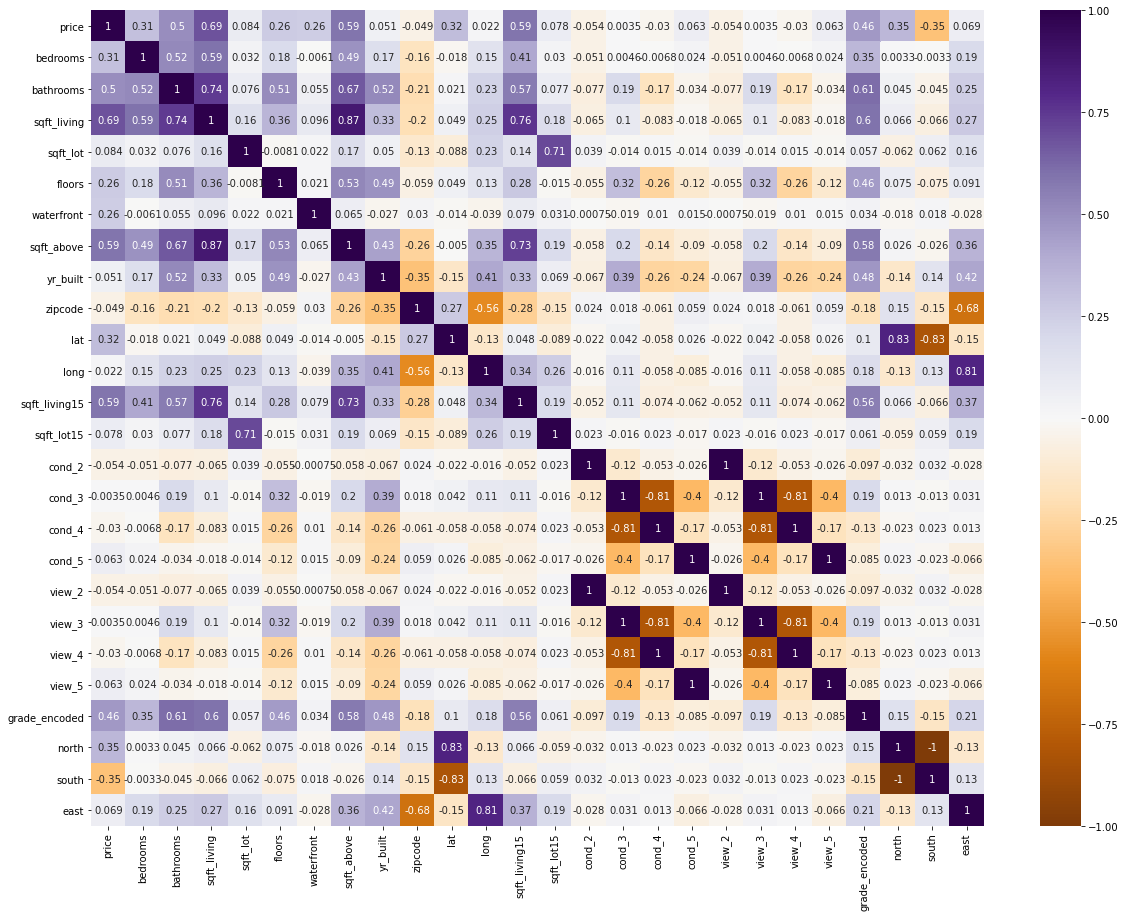

In [31]:
# create a correlation grid and a heatmap to further visualize variables of potential interest 
corr_grid = df.iloc[:,1:].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()

In [32]:
# print out the list of variables that are highly correlated 

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

corr_df=df.iloc[:,1:].corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
# set index to pairs
corr_df.set_index(['pairs'], inplace=True)
#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
# corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

corr_df = corr_df[corr_df.cc < 1]


multicollinear = corr_df[(corr_df.cc>=.75) & (corr_df.cc <1)]

In [33]:
multicollinear

,cc
pairs,
"(sqft_above, sqft_living)",0.871240
"(south, lat)",0.826008
"(east, long)",0.813935
"(view_3, cond_4)",0.812257
"(sqft_living, sqft_living15)",0.762835


In [34]:
corr_df = corr_df.reset_index()
price_correlations = corr_df[corr_df.pairs.apply(lambda x: True if 'price' in x else False)]
price_correlations = price_correlations.sort_values(by='cc',ascending=False)
price_correlations.pairs = price_correlations.pairs.apply(lambda x: list(filter(lambda i: i != 'price', list(x)))[0])
price_correlations.rename(columns={'pairs':'feature', 'cc':'cc_price'},inplace=True)
price_correlations.head(10)


,feature,cc_price
8,sqft_living,0.687376
14,sqft_living15,0.592875
15,sqft_above,0.589008
24,bathrooms,0.504598
28,grade_encoded,0.464117
40,north,0.347834
46,lat,0.323010
48,bedrooms,0.309834
54,floors,0.261501
56,waterfront,0.257070


### Interpretation:

`sqft_living15` and `sqft_above` are strongly correlated with price, but are also significantly correlated with `sqft_living` A threshold of **0.75** was used for the first model and therefore `sqft_above` and `sqft_living15` were dropped. 

`sqft_living`, `bathrooms`, `grade_encoded`, and `north` were therefore the variables that were decided on.  

#### Variables not correlated with price
Surprisingly, condition of the house (`condition`), number of bedrooms (`bedrooms`) and size of the lot (`sqft_lot`) were not strongly correlated with price. Also whether a house is in the east or west (`east`) did not seem to have a significant influence on price. 

## IV. Feature scaling and normalization 

Decrease the variability of the data and ensure that features have similar magnitudes

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

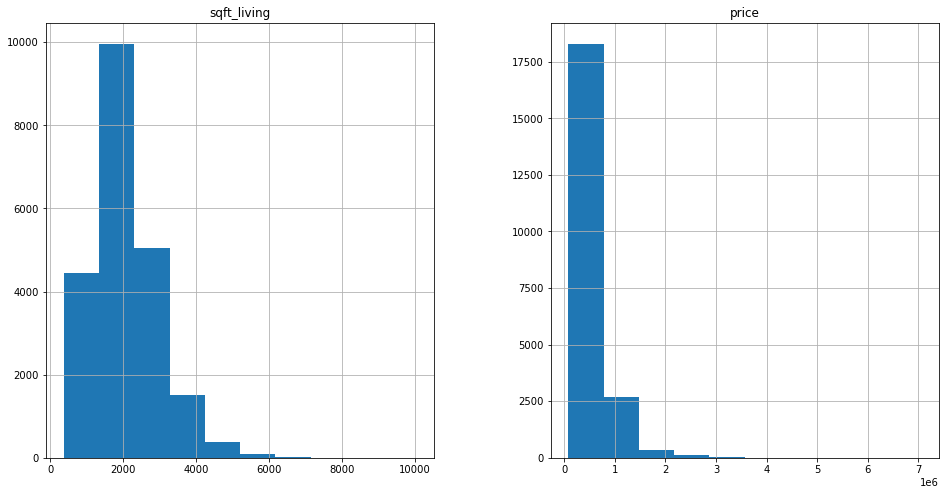

In [35]:
# plot hist of continuos variables in the model 
plt.clf()
df[['sqft_living','price']].hist(figsize=[8,4])

### Log scaling 

array([[<AxesSubplot:title={'center':'sqft_living_log'}>,
        <AxesSubplot:title={'center':'price_log'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

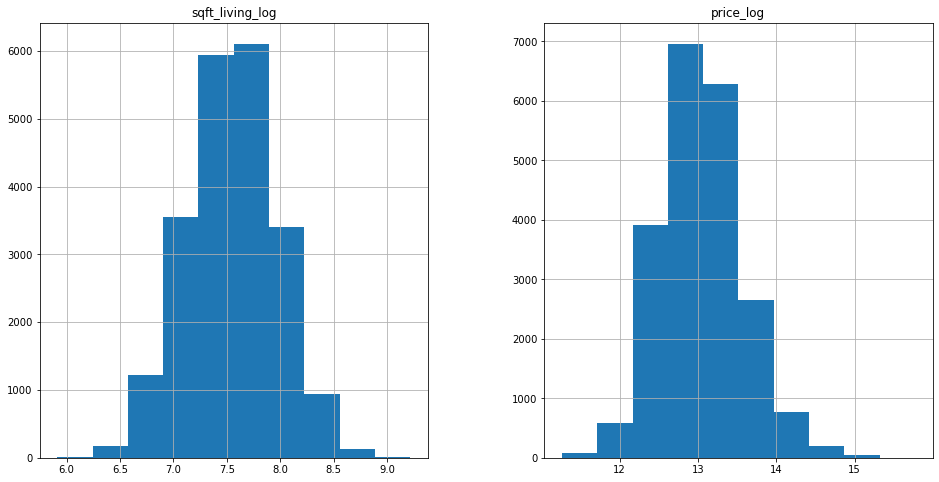

In [36]:
# log scale sqft livings and price - they are skewed 
df_log = pd.DataFrame()
df_log['sqft_living_log'] = np.log(df['sqft_living'])
df_log['price_log'] = np.log(df['price'])

plt.clf()
df_log.hist(figsize=[8,4])

### Standardization

In [37]:
# standardization on sqft_livings 
# mean normalization on grade and bathrooms 

from sklearn.preprocessing import Normalizer, StandardScaler
scaler = StandardScaler()
transformer = Normalizer()

df_scaled = pd.DataFrame()
df_scaled['sqft_living_scaled'] = df_log['sqft_living_log']
df_scaled['sqft_living_scaled'] = scaler.fit_transform(df_scaled[['sqft_living_scaled']])

In [38]:
df_final = pd.concat([df[['bathrooms','grade_encoded','north']],df_scaled,df_log.price_log],axis=1)

In [39]:
df_final.columns 

Index(['bathrooms', 'grade_encoded', 'north', 'sqft_living_scaled',
       'price_log'],
      dtype='object')

In [40]:
features = ['sqft_living_scaled', 'grade_encoded', 'bathrooms', 'north']

## V. Model fitting and interpretation

Fit a model using the features decided upon and interpret the results

In [41]:
# MLR using price_log and all scaled features 
model = sm.OLS.from_formula('price_log ~ sqft_living_scaled + grade_encoded + bathrooms + north', df_final).fit()
print(model.rsquared_adj) # grabs the rsquared value 
model.summary()

0.6334384974225467


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     9280.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:30:48   Log-Likelihood:                -5650.6
No. Observations:               21479   AIC:                         1.131e+04
Df Residuals:                   21474   BIC:                         1.135e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.6143      0.010   1215.331      0.000      12.594      12.635
sqft_living_scaled     0.2661      0.004     75.282      0.000       0.259       0.273
grade_encoded          0.1230      0.004     27.898      0.000       0.114       0.132
bathrooms              0.0255      0.005      5.576      0.000       0.017       0.034
north                  0.4137      0.004     95.010      0.000       0.405       0.422
==============================================================================
Omnibus:                     1185.499   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1450.494
Skew:                           0.565   Prob(JB):                         0.00
Kurtosis:                       3.586   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation
* A 1% increase in size of interior living space (`sqft_living`) will lead to a 26% increase in price 
* Each additional bathroom leads to a 2.5% increase in price on average 
* Houses in northern region are 41% more expensive on average 
* Going up a grade level is associate with a 12% increase in price 
___
- *Adjusted R-squared*: 63% of variance in price is explained by the predictors 
- *Durbin-Watson*: 1.99, no autocorrelation detected
___
#### Hypothesis: 
H0: All coefficiencts are equal to zero, sqft_living, grade_encoded, bathrooms and north have no effect on price  
HA: At least one coefficient is not zero 

F statistic is not close to 1, therefore we can reject the null hypothesis 

### Feature Selection
Perform feature selection to determine the best set of features to use in model

In [42]:
# feature selection
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    print("List starts with {}".format(included))
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
#         print(model.pvalues)
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
#             print('Removing {} from {}'.format(included[worst_feature], included))
            included.pop(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(included[worst_feature], worst_pval))
        if not changed:
            break
    return included

In [43]:
features

['sqft_living_scaled', 'grade_encoded', 'bathrooms', 'north']

In [44]:
result = stepwise_selection(df_final[features], df_final['price_log'], verbose=True)
print('resulting features:')
print(result)

List starts with []
Add  sqft_living_scaled             with p-value 0.0
Add  north                          with p-value 0.0
Add  grade_encoded                  with p-value 2.3315e-195
Add  bathrooms                      with p-value 2.4899e-08
resulting features:
['sqft_living_scaled', 'north', 'grade_encoded', 'bathrooms']


## VI. Model Validation and Testing

Test the model to ensure that assumptions for linear regression are met and that model will perform well on other data.

###  Assumptions of Linear Regression

**Normality of Residuals**

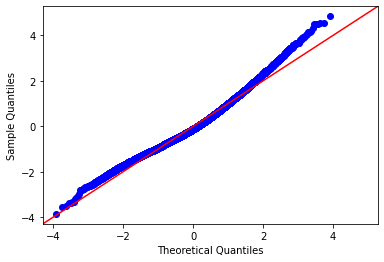

In [45]:

import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [46]:
from statsmodels.stats.diagnostic import normal_ad
# perform test on residuals 
p_value = normal_ad(residuals)[1]

if p_value < 0.05: 
    print('Residuals are normally distributed with a p value of {}'.format(p_value))
else:
    print('Residuals not normally distributed')
        

Residuals are normally distributed with a p value of 0.0


**Homosscedasticity**

<Figure size 432x288 with 0 Axes>

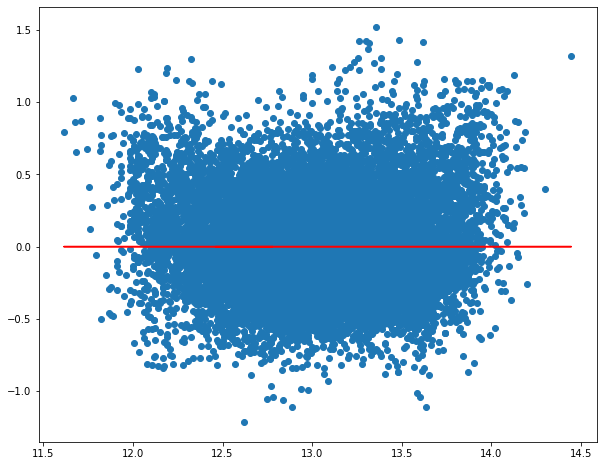

In [47]:
# homoskedasticity
fitted_values = model.predict()
residuals = df_final.price_log - fitted_values

plt.clf()
fig = plt.figure(figsize=(10,8))
# plt.scatter(fitted_values, residuals)
plt.scatter(model.fittedvalues, model.resid)
y_values = [0 for x in fitted_values]
plt.plot(fitted_values, y_values, color='red')

### Train test split and cross-validation
In addition to doing a train test split,  also decided to use cross validation to further evaluate the model due to the fact that the training and test MSE depend heavily on how the training and test set were created. Because the results for the cross validation are very similar it was concluded that the model generalizes well to other data

In [48]:
from sklearn.model_selection import train_test_split
X = df_final[features]
y = df_final['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)
y_hat_train = linreg.predict(X_train)

17183 4296 17183 4296


In [49]:
# calculate the residuals and the MSE of the test set 
# Root Mean Square Error is the standard deviation of the residuals(prediction errors)
# MSE is the average of the square of the errors.
# Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), 
from sklearn.metrics import mean_squared_error

test_residuals = y_hat_test - y_test
test_error = mean_squared_error(y_test, y_hat_test)
train_error = mean_squared_error(y_train, y_hat_train)
print(test_error)
print(train_error)

0.10141995067802917
0.09850866218852926


In [50]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error) 
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_5_results.mean()

0.0992082373158871

In [51]:
cv_5_results

array([0.10232429, 0.10351571, 0.09776645, 0.10388491, 0.08854983])

#### Conclusion: 
Results above are all similar (close to .1), indicating the model will perform well with other data.

### Testing model for multicollinearity 

Due to the fact that collinearity with sqft_living was a concern, I decided to test further for multicollinearity in the model. 

In [52]:
# test for multicollinearity in model using VIF Score
# VIF is a measure of how much the variance of the coefficient derived from the model is inflated by collinearity
# taking the ratio of the variance of all of the coefficients divided by the variance of one variable's coefficient 
# when it is the only variable in the model 

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('price_log ~ sqft_living_scaled + grade_encoded + bathrooms + north',
                 df_final,
                 return_type='dataframe')
vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df['features'] = X.columns
print(vif_df)

         vif            features
0  23.346337           Intercept
1   2.707747  sqft_living_scaled
2   1.885624       grade_encoded
3   2.496030           bathrooms
4   1.027073               north


#### Conclusion: 
A VIF score of 2.70 is considered acceptable 

## Results 

* For Kings County, the size of the interior living space of the house is the most significant predictor of price.  
* Construction/design quality matter! Consider the quality of contractors and architects when optimizing for this. 
* Bathrooms vs. bedrooms: Increasing the number of bathrooms has a strong effect on price, as opposed to more bedrooms. 
* Where the house is built matters quite a bit. Building north of 47.5 latitude can result in a significant increase in house value

## Limitations
* The data used to produce the model is specific to one county in a major metropolitan area. It may not generalize to other counties and regions in the US.  
* Other house features, such as number of garages were not included as features in the data and could not be factored into the model.

## Next Steps 

* Look at other counties and geographies to see whether the model performs well in other areas of Washington, and in the greater US. 
* Geographically, instead of n/s and e/w, look at four quadrants (ie: northeast, southwest, etc..) 
* Predict other outcomes, such as how quickly a house will sell given certain predictors, or the grade/quality of a house. 
* Further explore how other highly correlated variables (ie: sqft_above) could predict price 
* Explore polynomial relationships between some of the predictor variables with price 